In [265]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import seaborn as sea
from scipy.stats import norm, binom

In [199]:
pwd

'/home/gavin/Boxcar/game'

''

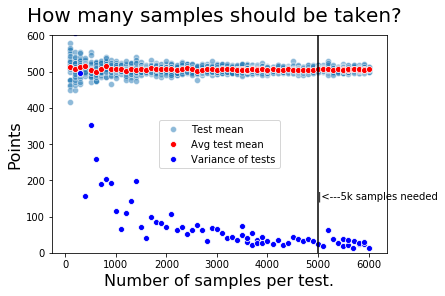

In [212]:
batchtest = pd.read_csv('data/batchtests.csv')
mean_per_test = batchtest.groupby('batch_size').mean()
std_per_test = batchtest.groupby('batch_size').var()
fig = plt.figure()
fig.ax = sea.scatterplot(
    batchtest['batch_size'], 
    batchtest['mean'], 
    alpha=.5,
    label='Test mean')
fig.ax = sea.scatterplot(
    mean_per_test['mean'].index,
    mean_per_test['mean'],
    color = 'r',
    label='Avg test mean')
fig.ax = sea.scatterplot(
    std_per_test['mean'].index,
    std_per_test['mean'],
    color = 'b',
    label='Variance of tests')
plt.ylim(bottom=0, top=600);
plt.legend()

fig.ax.set_ylabel('Points', fontsize=16)
fig.ax.set_xlabel('Number of samples per test.', fontsize=16)
fig.suptitle('How many samples should be taken?', fontsize=20)
fig.ax.axvline(5000, color='k')
fig.ax.text(5000,150, '|<---5k samples needed')
;

In [201]:
pwd

'/home/gavin/Boxcar/game'

''

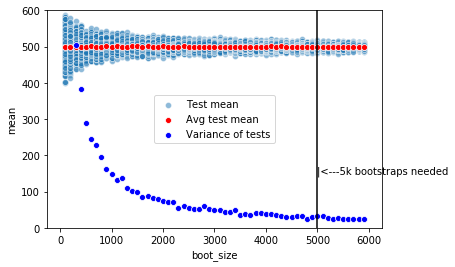

In [278]:
scores = pd.read_csv('data/perfect.csv')
xplots = []
yplots = []
for bootstrap_size in range(100, 6000, 100):
    for plots in range(500):
        xplots.append(bootstrap_size)
        yplots.append(
            np.random.choice(
            a=scores['score'],
            size=bootstrap_size,
            replace=True).mean()
        )   
        
boot_df = pd.DataFrame(zip(xplots, yplots), columns=['boot_size','mean'])

mean_per_test = boot_df.groupby('boot_size').mean()
std_per_test = boot_df.groupby('boot_size').var()

fig = plt.figure()
fig.ax = sea.scatterplot(
    xplots, 
    yplots, 
    alpha=.5,
    label='Test mean')
fig.ax = sea.scatterplot(
    mean_per_test['mean'].index,
    mean_per_test['mean'],
    color = 'r',
    label='Avg test mean')
fig.ax = sea.scatterplot(
    std_per_test['mean'].index,
    std_per_test['mean'],
    color = 'b',
    label='Variance of tests')
plt.ylim(bottom=0, top=600);
plt.legend()

fig.ax.axvline(5000, color='k')
fig.ax.text(5000,150, '|<---5k bootstraps needed')
;

In [ ]:
def bootstrap

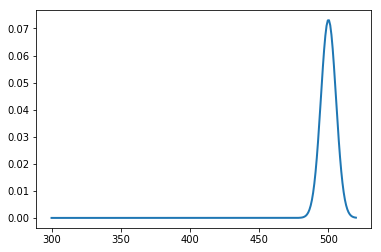

In [273]:
scores = pd.read_csv('data/perfect.csv')
mean = []
std = []
for _ in range(5000):
    boot = np.random.choice(
            a=scores['score'],
            size=5000,
            replace=True)
    mean.append(boot.mean())
    std.append(boot.std())
dist = norm(np.mean(mean), np.std(mean))
x = np.linspace(300, 520, num=250)
fig = plt.figure()
fig.ax = plt.plot(x, dist.pdf(x), linewidth=2)




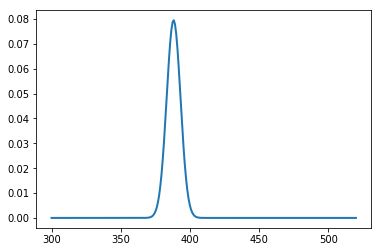

In [279]:
scores = pd.read_csv('data/random.csv')
mean = []
std = []
for _ in range(5000):
    boot = np.random.choice(
            a=scores['score'],
            size=5000,
            replace=True)
    mean.append(boot.mean())
    std.append(boot.std())
dist = norm(np.mean(mean), np.std(mean))
x = np.linspace(300, 520, num=250)
fig = plt.figure()
fig.ax = plt.plot(x, dist.pdf(x), linewidth=2)